# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
import scipy as sp

## Challenge 1

#### The data we will use in this challenge is:

In [31]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

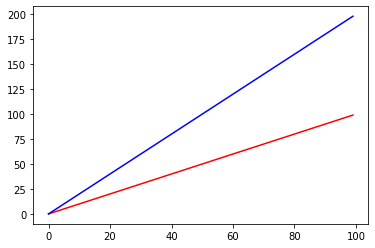

In [32]:
# Method 1 - plt.plot() method

plt.plot(x, color = 'r')
plt.plot(y, color = 'b')
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

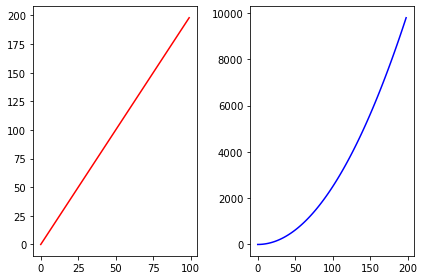

In [33]:
# Method 2 (Source: Stack Overflow)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x, y, color = 'r')
ax2.plot(y, z, color = 'b')

fig.tight_layout()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

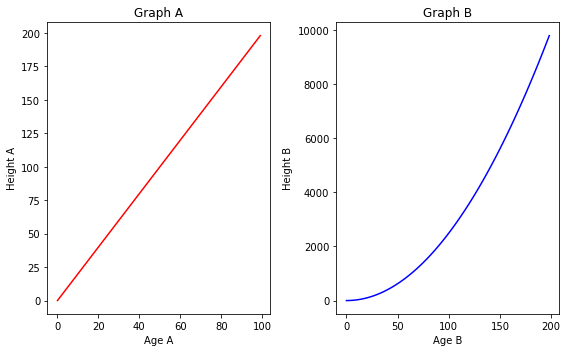

In [34]:
# your code here

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
ax1.plot(x, y, color = 'r')
ax2.plot(y, z, color = 'b')
                               
# Assign a TITLE to both graphs
                               
ax1.set_title('Graph A')
ax2.set_title('Graph B')
   
# Assign a LABEL to both graphs in the X AXIS
                               
ax1.set_xlabel('Age A')
ax2.set_xlabel('Age B')
                               
# Assign a LABEL to both graphs in the Y AXIS
                               
ax1.set_ylabel('Height A')
ax2.set_ylabel('Height B')                               
 
# Now its time to print!                               
                               
fig.tight_layout()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [47]:
# your code here (Source: Stack Overflow)

x_axis = np.linspace(0, 5, 500)

# Define the functions (using Lambda)

y1 = lambda x: x**2
y2 = lambda x: np.exp(x)

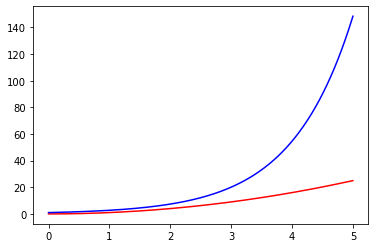

In [48]:
# Define the plot

plt.plot(x_axis, y1(x_axis), color = 'r')
plt.plot(x_axis, y2(x_axis), color = 'b')

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

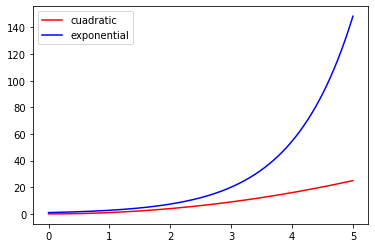

In [46]:
# your code here
# Add a label to create a legend

x_axis = np.linspace(0, 5, 500)

plt.plot(x_axis, y1(x_axis), color = 'r', label = 'cuadratic')
plt.plot(x_axis, y2(x_axis), color = 'b', label = 'exponential')

plt.legend()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here

fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

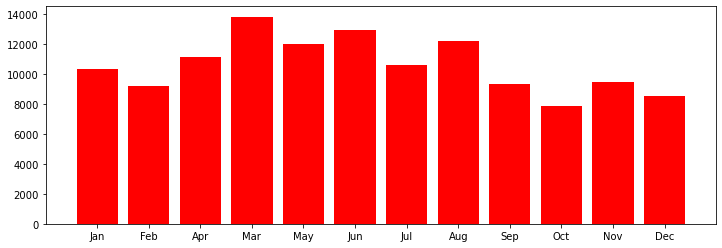

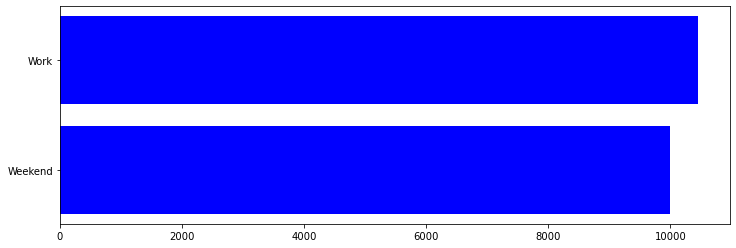

In [9]:
# *MEDIAN* STEPS BY MONTH_ENCODED - group by months, filtering steps, compute median
# your code here

monthly_steps = fitbit.groupby(by = ['Months_encoded'])['Steps'].median()
fig = plt.figure(figsize = (12, 4))

plt.bar(monthly_steps.index, monthly_steps.values, color = 'r')

# TICKS is used to get or set the current tick locations and labels of the x-axis  

plt.xticks(monthly_steps.index,['Jan','Feb','Apr','Mar','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.savefig('monthly_steps.png')

# *MEDIAN* STEPS BY WORK_OR_WEEKEND
# your code here

weekly_steps = fitbit.groupby(by = ['Work_or_Weekend'])['Steps'].median()
fig = plt.figure(figsize = (12, 4))

# Print horizontal bar to a better visual display

plt.barh(weekly_steps.index, weekly_steps.values, color = 'b')
plt.yticks([0, 1], ['Weekend', 'Work'])
plt.savefig('daily_and_weekend.png')

In [10]:
"""""
Insights: In conclusion, it could be said that the month with the highest number of steps as an average is March, with almost 14,000 steps, preceeded by June and August (if we knew the location, we could make weather assumptions, for instance).
Moreover, it can be also be concluded that registered people tend to walk slightly more during work days than during the weekend.
"""""

'""\nInsights: In conclusion, it could be said that the month with the highest number of steps as an average is March, with almost 14,000 steps, preceeded by June and August (if we knew the location, we could make weather assumptions, for instance).\nMoreover, it can be also be concluded that registered people tend to walk slightly more during work days than during the weekend.\n'

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

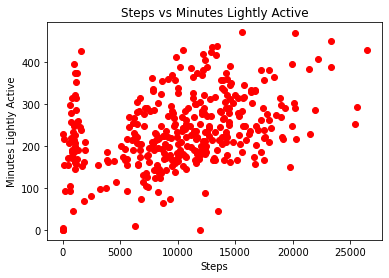

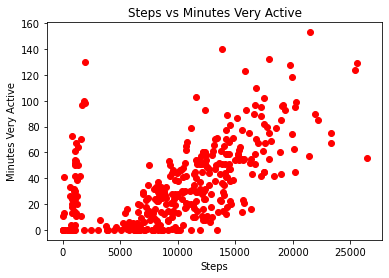

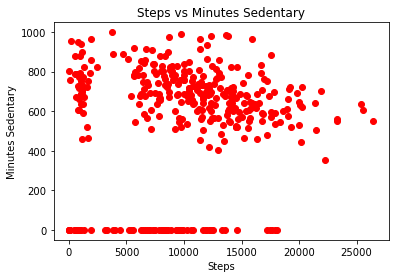

<Figure size 432x288 with 0 Axes>

In [17]:
# your code here - Steps on the X axis, minutes in the Y axis

cols = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']

# Create a loop

for column in cols:
    plt.xlabel('Steps')
    plt.ylabel(column)
    plt.title('Steps vs ' + column)
    plt.scatter(fitbit['Steps'], fitbit[column], color = 'r')
    plt.figure()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [4]:
# your code here

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [5]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [6]:
# NUMERICAL VARIABLES
# your code here - select only 'number' type

titanic.select_dtypes(include = 'number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [7]:
# CATEGORICAL VARIABLES
# your code here - select only 'object' type

titanic.select_dtypes(include = 'object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [48]:
# your code here

sns.set(style = "dark")

#### Use the right visulalization to show the distribution of column `Age`.

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

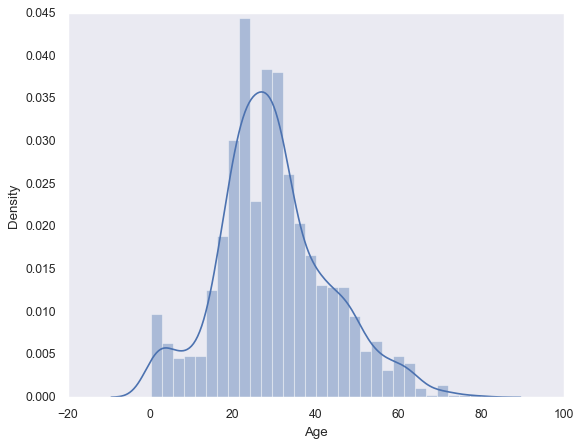

In [61]:
# your code here
sns.distplot(titanic['Age'])

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Age', ylabel='Density'>

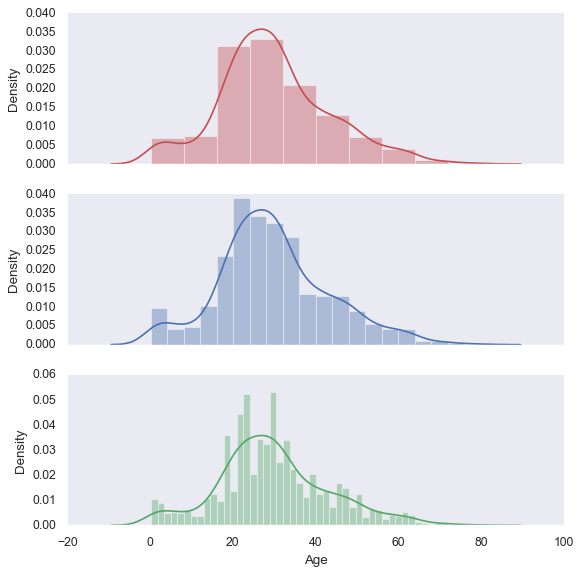

In [50]:
# your code here
f, axes = plt.subplots(3, 1, figsize = (8, 8), sharex = True)
sns.despine(left = True)    # Remove the top and right spines from plot(s)

# Bin equal to 10
sns.distplot(titanic['Age'], color = 'r', ax = axes[0], bins = 10)

# Bin equal to 20
sns.distplot(titanic['Age'], color = 'b', ax = axes[1], bins = 20)

# Bin equal to 50
sns.distplot(titanic['Age'], color = 'g', ax = axes[2], bins = 50)

#### How does the bin size affect your plot?

In [52]:
"""
The more the number of bins, the more precise the plot will be. As we use less bins, a higher number of values are grouped in a unique bin, so precision gets lower. I think that the ideal way is something in the middle because too many bins can be visually uncomfortable too
"""

'\nThe more the number of bins, the more precise the plot will be. As we use less bins, a higher number of values are grouped in a unique bin, so precision gets lower. I think that the ideal way is something in the middle because too many bins can be visually uncomfortable too\n'

#### Use seaborn to show the distribution of column `Age`.

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

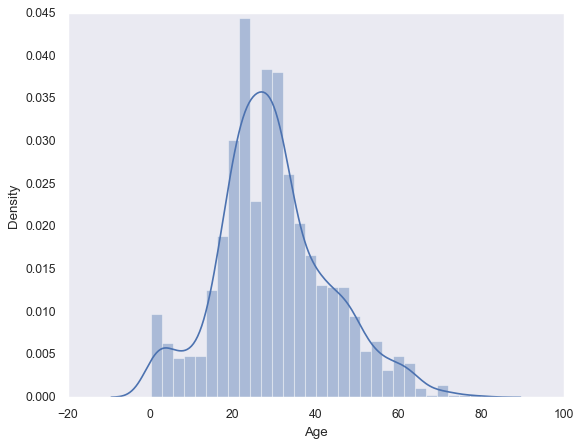

In [53]:
# your code here

sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:ylabel='Gender'>

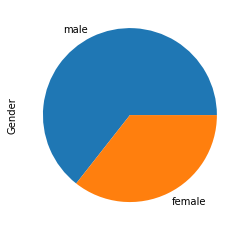

In [26]:
# Method 1 - matplotlib
# your code here - After 1,000,000 tries I realised it was NON NUMERIC DATA!!!!
# Types of plot for non numeric data?

titanic['Gender'].value_counts().plot.pie()

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

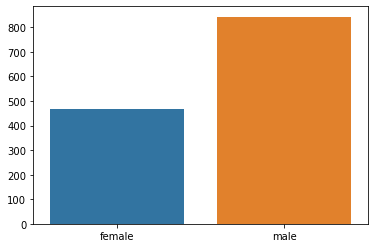

In [18]:
# Method 2 - seaborn
# your code here

sns.barplot(titanic.Gender.value_counts().index, titanic.Gender.value_counts().values)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:>

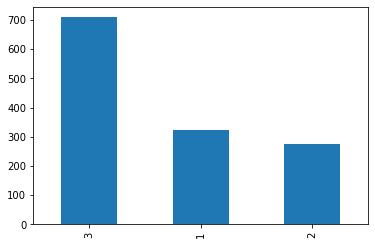

In [23]:
# your code here

titanic['Pclass'].value_counts().plot.bar()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

{'whiskers': [<matplotlib.lines.Line2D at 0x13307e60dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x13307e533a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13307e60b50>],
 'medians': [<matplotlib.lines.Line2D at 0x13307e53940>],
 'fliers': [<matplotlib.lines.Line2D at 0x13307e53c10>],
 'means': []}

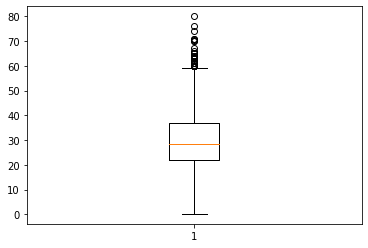

In [33]:
# your code here - which tool has all statistical information? - Boxplot

plt.boxplot(titanic.Age)

In [34]:
"""
I used boxplot because it gives us plenty of information (quartiles, median, abnormal values, etc) 
"""

'\nInsights: This boxplot is very useful since it gives us plenty of data as quartiles (q2: 25 - almost 30 years and q3: almost 30 years to almost 40), median is 30 years, and from 70 years onwards we have abnormal values\n'

#### What does the last plot tell you about the feature `Age`?

In [35]:
"""
What it tells me is that most of people who went to the Titanic was pretty young, since the median is 30 years old, and from 60 years onwards they are considered abnormal values. This reinforces the idea that the majority of passengers were young
"""

'\nWhat it tells me is that most of people who went to the Titanic was pretty young, since the median is 30 years old, and from 60 years onwards they are considered abnormal values. This reinforces the idea that the majority of passengers were young\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

C:\Users\Angela\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

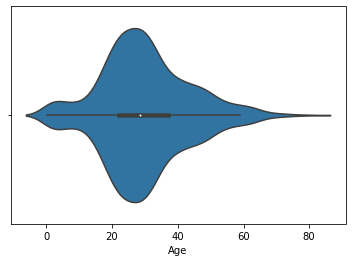

In [43]:
# your code here

sns.violinplot("Age", data = titanic)

#### What additional information does the last plot provide about feature `Age`?

In [44]:
"""
It also gives us an insight of the data distribution
"""

'\nIt also gives us an insight of the data distribution\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

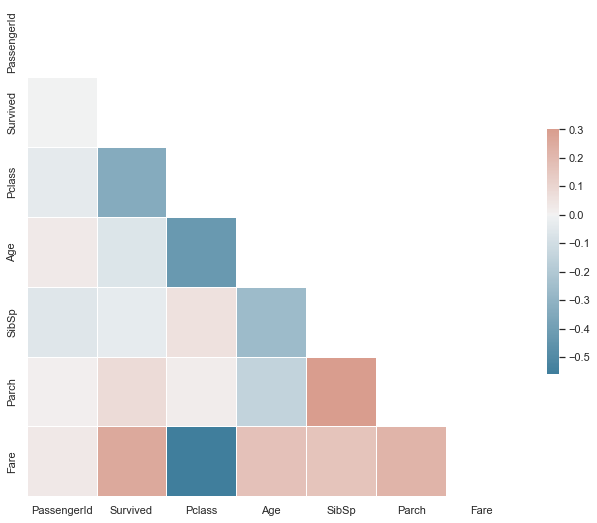

In [45]:
# your code here - Source -> Seaborn PyData Org

sns.set_theme(style="white")

# Compute the correlation matrix
corr = titanic.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### What are the most correlated features?

In [46]:
"""
SibSp and Parch are the most correlated values
"""

'\nSibSp and Parch are the most correlated values\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

{'whiskers': [<matplotlib.lines.Line2D at 0x13309ed69a0>,
 'caps': [<matplotlib.lines.Line2D at 0x13309ed6f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x13309ed66d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13309ede520>],
 'fliers': [<matplotlib.lines.Line2D at 0x13309ede7f0>],
 'means': []}

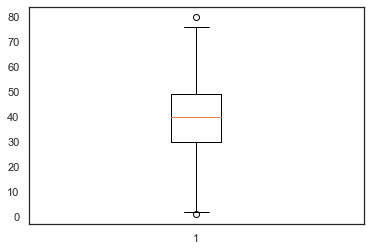

In [53]:
# your code here

plt.boxplot([titanic.loc[titanic['Pclass'] == 1, 'Age']])

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

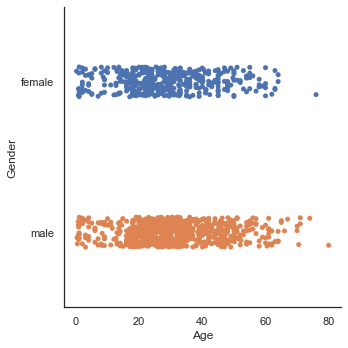

In [54]:
# your code here

sns.catplot(x = "Age", y = "Gender", data = titanic)